In [127]:
# Lab 3

# import packages for analysis and modeling
import pandas as pd  # data frame operations
from pandas.plotting import scatter_matrix  # scatter plot matrix
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
from sklearn.tree import DecisionTreeRegressor  # machine learning tree
from sklearn.ensemble import RandomForestRegressor # ensemble method
import matplotlib.pyplot as plt  # 2D plotting
import seaborn as sns

%matplotlib inline

In [128]:
# assigning url to coaches_csv_raw
coaches_csv_raw = "https://raw.githubusercontent.com/2SUBDA/IST_718/master/Coaches9.csv"
# reading in coaches9 csv
coaches = pd.read_csv(coaches_csv_raw)
coaches['School'] = coaches['School'].astype(str) # converting to string to match with apr df
# looking at the df
coaches.head()

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,--,$0,--
1,Akron,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500"
2,Alabama,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000"
3,Alabama at Birmingham,C-USA,Bill Clark,"$900,000","$900,000","$950,000","$165,471",$0,"$3,847,500"
4,Appalachian State,Sun Belt,Scott Satterfield,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417"


In [271]:
coaches.shape

(129, 9)

In [129]:
coaches['Conference'].unique()

array(['Mt. West', 'MAC', 'SEC', 'C-USA', 'Sun Belt', 'Pac-12', 'Ind.',
       'Big 12', 'ACC', 'AAC', 'Big Ten'], dtype=object)

In [130]:
# reading in additional data from https://www.icpsr.umich.edu/web/ICPSR/studies/26801/summary
gr_data = "C:/Users/nickl/Documents/Syracuse/IST 718 - Big Data Analytics/26801-0001-Data.tsv"
# reading in coaches9 csv
gr = pd.read_csv(gr_data, sep = '\t')

# looking at the df
gr.head()

,DATA_TAB_GENERALINFO,SCL_UNITID,SCL_NAME,SPORT_CODE,SPORT_NAME,ACADEMIC_YEAR,SCL_DIV_14,SCL_SUB_14,CONFNAME_14,D1_FB_CONF_14,...,PUB_AWARD_14,PUB_AWARD_13,PUB_AWARD_12,PUB_AWARD_11,PUB_AWARD_10,PUB_AWARD_09,PUB_AWARD_08,PUB_AWARD_07,PUB_AWARD_06,RAW_OR_CI
0,,100654,Alabama A&M University,20,Women's Bowling,2014,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,0,0,0,0,0,0,0,0,1,1
1,,100654,Alabama A&M University,14,"Men's Track, Indoor",2014,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,0,0,0,0,0,0,0,0,0,2
2,,100654,Alabama A&M University,4,Football,2014,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,0,0,0,0,0,0,0,0,0,2
3,,100654,Alabama A&M University,1,Baseball,2014,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,0,0,0,0,0,0,0,0,0,2
4,,100654,Alabama A&M University,19,Women's Basketball,2014,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,1,0,0,0,0,1,1,0,0,2


In [131]:
# separating the football observations from other sports
gr_football = gr[gr['SPORT_NAME'] == 'Football']

gr_football.head()

,DATA_TAB_GENERALINFO,SCL_UNITID,SCL_NAME,SPORT_CODE,SPORT_NAME,ACADEMIC_YEAR,SCL_DIV_14,SCL_SUB_14,CONFNAME_14,D1_FB_CONF_14,...,PUB_AWARD_14,PUB_AWARD_13,PUB_AWARD_12,PUB_AWARD_11,PUB_AWARD_10,PUB_AWARD_09,PUB_AWARD_08,PUB_AWARD_07,PUB_AWARD_06,RAW_OR_CI
2,,100654,Alabama A&M University,4,Football,2014,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,0,0,0,0,0,0,0,0,0,2
35,,100724,Alabama State University,4,Football,2014,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,0,0,0,0,0,0,0,0,0,2
67,,100751,University of Alabama,4,Football,2014,1,1,Southeastern Conference,Southeastern Conference,...,0,1,0,0,0,0,0,0,0,2
83,,100858,Auburn University,4,Football,2014,1,1,Southeastern Conference,Southeastern Conference,...,0,0,0,0,0,0,0,0,1,2
92,,101480,Jacksonville State University,4,Football,2014,1,2,Ohio Valley Conference,Ohio Valley Conference,...,0,0,0,0,0,0,0,0,0,2


In [132]:
gr.shape

(6511, 76)

In [133]:
gr_football.shape # brought down the observations from 6511 to 249

(249, 76)

In [176]:
# subetting the dataframe with only the school name and APR rates
gr_apr = gr_football[['SCL_NAME', 'APR_RATE_2004_1000', 'APR_RATE_2005_1000', 'APR_RATE_2006_1000', 'APR_RATE_2007_1000', 'APR_RATE_2008_1000', 'APR_RATE_2009_1000', 'APR_RATE_2010_1000', 'APR_RATE_2011_1000', 'APR_RATE_2012_1000', 'APR_RATE_2013_1000', 'APR_RATE_2014_1000', 'SCL_PRIVATE', 'SCL_HBCU', 'MULTIYR_SQUAD_SIZE' ]]
gr_apr.head()

,SCL_NAME,APR_RATE_2004_1000,APR_RATE_2005_1000,APR_RATE_2006_1000,APR_RATE_2007_1000,APR_RATE_2008_1000,APR_RATE_2009_1000,APR_RATE_2010_1000,APR_RATE_2011_1000,APR_RATE_2012_1000,APR_RATE_2013_1000,APR_RATE_2014_1000,SCL_PRIVATE,SCL_HBCU,MULTIYR_SQUAD_SIZE
2,Alabama A&M University,871,921,941,919,930,935,931,951,940,933,905,0,1,321
35,Alabama State University,858,958,866,939,850,870,879,840,905,857,902,0,1,287
67,University of Alabama,890,966,971,950,936,972,994,969,974,967,1000,0,2,392
83,Auburn University,986,976,949,910,964,915,970,924,985,978,985,0,2,368
92,Jacksonville State University,860,857,867,950,854,970,921,916,941,945,965,0,2,339


In [177]:
# creating an average apr rate for each school
apr = gr_apr.loc[: , "APR_RATE_2004_1000":"APR_RATE_2014_1000"]
gr_apr['apr_avg'] = apr.mean(axis = 1)

gr_apr.head()

<ipython-input-177-7f95fc7b3a5d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gr_apr['apr_avg'] = apr.mean(axis = 1)


,SCL_NAME,APR_RATE_2004_1000,APR_RATE_2005_1000,APR_RATE_2006_1000,APR_RATE_2007_1000,APR_RATE_2008_1000,APR_RATE_2009_1000,APR_RATE_2010_1000,APR_RATE_2011_1000,APR_RATE_2012_1000,APR_RATE_2013_1000,APR_RATE_2014_1000,SCL_PRIVATE,SCL_HBCU,MULTIYR_SQUAD_SIZE,apr_avg
2,Alabama A&M University,871,921,941,919,930,935,931,951,940,933,905,0,1,321,925.181818
35,Alabama State University,858,958,866,939,850,870,879,840,905,857,902,0,1,287,884.000000
67,University of Alabama,890,966,971,950,936,972,994,969,974,967,1000,0,2,392,962.636364
83,Auburn University,986,976,949,910,964,915,970,924,985,978,985,0,2,368,958.363636
92,Jacksonville State University,860,857,867,950,854,970,921,916,941,945,965,0,2,339,913.272727


In [184]:
apr_final = gr_apr[['SCL_NAME', 'apr_avg','SCL_PRIVATE', 'SCL_HBCU', 'MULTIYR_SQUAD_SIZE']] # creating new dataframe with only school name and average apr
apr_final.columns = ['School', 'APR_AVG', 'Private', 'HBCU', 'Squad_Size'] # renaming columns
apr_final['School'] = apr_final['School'].astype(str) # converting to string to clean school names
apr_final['School'] = apr_final['School'].str.replace('(?:University|of)', '') # removing the words university and of to match school names
apr_final['School'] = apr_final['School'].str.replace(' ', '') # removing excess spaces
apr_final['School'] = apr_final['School'].str.replace('State', ' State') # adding space to state
apr_final['School'] = apr_final['School'].str.replace(',Madison', '') # fixing wisconsin because i went there
apr_final['School'] = apr_final['School'].str.replace('Tech', ' Tech') # fixing tech schools
apr_final['School'] = apr_final['School'].str.replace('South', 'South ') # fixing south schools
apr_final['School'] = apr_final['School'].str.replace('Southern', ' Southern') # fixing southern schools
apr_final['School'] = apr_final['School'].str.replace('Western', 'Western ') # fixing western schools
apr_final['School'] = apr_final['School'].str.replace('West', 'West ') # fixing west schools
apr_final['School'] = apr_final['School'].str.replace('San', ' San ') # fixing San schools
apr_final['School'] = apr_final['School'].str.replace('College', ' College') # fixing college schools
apr_final['School'] = apr_final['School'].str.replace('Young', ' Young') # fixing BY
apr_final['School'] = apr_final['School'].str.replace('Bowling', 'Bowling ') # fixing BG
apr_final['School'] = apr_final['School'].str.replace('Central', 'Central ') # fixing Central schools
apr_final['School'] = apr_final['School'].str.replace('Middle', 'Middle ') # fixing MT
apr_final['School'] = apr_final['School'].str.replace('New', 'New ') # fixing BG
apr_final['School'] = apr_final['School'].str.replace('A&M', ' A&M') # fixing A&M

apr_final

<ipython-input-184-0733b71025ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apr_final['School'] = apr_final['School'].astype(str) # converting to string to clean school names
<ipython-input-184-0733b71025ed>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  apr_final['School'] = apr_final['School'].str.replace('(?:University|of)', '') # removing the words university and of to match school names
<ipython-input-184-0733b71025ed>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

,School,APR_AVG,Private,HBCU,Squad_Size
2,Alabama A&M,925.181818,0,1,321
35,Alabama State,884.000000,0,1,287
67,Alabama,962.636364,0,2,392
83,Auburn,958.363636,0,2,368
92,Jacksonville State,913.272727,0,2,339
...,...,...,...,...,...
6350,West Virginia,943.636364,0,2,359
6409,Wisconsin,969.636364,0,2,366
6435,Wyoming,942.454545,0,2,340
6446,Stanford,982.545455,1,2,353


In [268]:
# resseting index
coaches.reset_index(drop=True)
apr_final.reset_index(drop=True)

# joining the dataframes
df = pd.merge(left = coaches, right = apr_final, how = 'inner', left_on = 'School', right_on = 'School')

df

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,APR_AVG,Private,HBCU,Squad_Size
0,Akron,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500",932.454545,0,2,360
1,Alabama,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000",962.636364,0,2,392
2,Appalachian State,Sun Belt,Scott Satterfield,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417",957.090909,0,2,301
3,Arizona,Pac-12,Kevin Sumlin,"$1,600,000","$2,000,000","$2,025,000",--,$0,"$10,000,000",938.090909,0,2,362
4,Arizona State,Pac-12,Herm Edwards,"$2,000,000","$2,000,000","$3,010,000",--,$0,"$8,166,667",939.909091,0,2,367
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Washington,Pac-12,Chris Petersen,"$4,375,000","$4,377,500","$1,050,000","$300,000",$0,"$26,354,166",956.000000,0,2,365
64,Washington State,Pac-12,Mike Leach,"$3,500,000","$3,500,000","$725,000","$75,000",$0,"$4,900,000",935.909091,0,2,369
65,West Virginia,Big 12,Dana Holgorsen,"$3,605,000","$3,617,500","$1,000,000","$90,000",$0,"$7,150,000",943.636364,0,2,359
66,Wisconsin,Big Ten,Paul Chryst,"$3,750,000","$3,750,000",--,"$290,000",$0,"$6,000,000",969.636364,0,2,366


In [269]:
#Looking at missing values for each column
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count


In [187]:
# cleaning the totalpay column for the model
df['TotalPay'] = df['TotalPay'].astype(str) # converting to int
df['TotalPay'] = df['TotalPay'].str.replace(',', '') # removing ,
df['TotalPay'] = df['TotalPay'].str.replace('$', '') # removing $
df['TotalPay'] = df['TotalPay'].str.replace(' ', '') # removing excess spaces
df['TotalPay'] = df['TotalPay'].str.replace('--', '0') # removing -- for bonus

df['TotalPay'] = df['TotalPay'].astype(int) # converting to int


<ipython-input-187-e6a73b27f2bb>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['TotalPay'] = df['TotalPay'].str.replace('$', '') # removing $


In [188]:
df = df[['School', 'Conference', 'TotalPay', 'APR_AVG', 'Private', 'HBCU', 'Squad_Size']] # subsetting with the columns that will be used in the model
df

,School,Conference,TotalPay,APR_AVG,Private,HBCU,Squad_Size
0,Akron,MAC,412500,932.454545,0,2,360
1,Alabama,SEC,8307000,962.636364,0,2,392
2,Appalachian State,Sun Belt,712500,957.090909,0,2,301
3,Arizona,Pac-12,2000000,938.090909,0,2,362
4,Arizona State,Pac-12,2000000,939.909091,0,2,367
...,...,...,...,...,...,...,...
63,Washington,Pac-12,4377500,956.000000,0,2,365
64,Washington State,Pac-12,3500000,935.909091,0,2,369
65,West Virginia,Big 12,3617500,943.636364,0,2,359
66,Wisconsin,Big Ten,3750000,969.636364,0,2,366


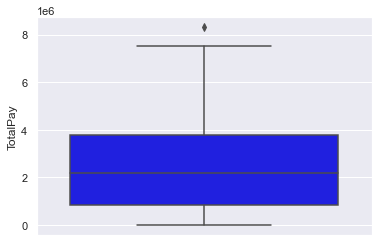

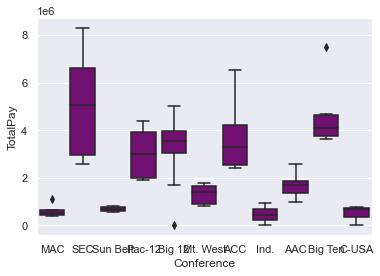

In [189]:
## Summary Plots

# boxplot of coaches salaries
sns.boxplot(y = 'TotalPay', data = df, color = 'blue')
plt.show()

# boxplot of salaries by conference
sns.boxplot(x = 'Conference', y = 'TotalPay', data = df, color = 'purple')
plt.show()

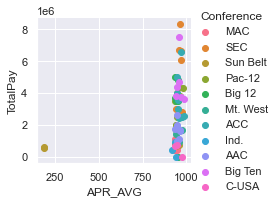

In [190]:
# trellis plot of salary by APR, hue different for conference

sns.set(style = "darkgrid")

graph = sns.FacetGrid(df, hue = 'Conference')
graph.map(plt.scatter, 'APR_AVG', 'TotalPay', alpha = 1)
graph.add_legend()
plt.show()

In [191]:
# splitting into train/test sets for validation
np.random.seed(1234)
df['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(df))
df_train = df[df['runiform'] >= 0.20]
df_test = df[df['runiform'] < 0.20]
# check training data frame
print('\ndf_train data frame (rows, columns): ',df_train.shape)
print(df_train.head())
# check test data frame
print('\ndf_test data frame (rows, columns): ',df_test.shape)
print(df_test.head())


df_train data frame (rows, columns):  (56, 8)
              School Conference  TotalPay     APR_AVG  Private  HBCU  \
1            Alabama        SEC   8307000  962.636364        0     2   
2  Appalachian State   Sun Belt    712500  957.090909        0     2   
3            Arizona     Pac-12   2000000  938.090909        0     2   
4      Arizona State     Pac-12   2000000  939.909091        0     2   
5     Arkansas State   Sun Belt    825000  944.272727        0     2   

   Squad_Size  runiform  
1         392  0.622109  
2         301  0.437728  
3         362  0.785359  
4         367  0.779976  
5         355  0.272593  

df_test data frame (rows, columns):  (12, 8)
              School Conference  TotalPay     APR_AVG  Private  HBCU  \
0              Akron        MAC    412500  932.454545        0     2   
17       Connecticut        AAC   1100000  958.636364        0     2   
22     Georgia State   Sun Belt    569000  184.545455        0     2   
33          Marshall      C-US

<ipython-input-191-10895ca2146e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(df))


In [192]:
# creating single variable linear regression model

# simple model with salary as a function of conference
model = str('TotalPay ~ Conference')

# fitting model to the train set
model_fit = smf.ols(model, data = df_train).fit()

# summary of model performance
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     7.886
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           3.76e-07
Time:                        15:31:25   Log-Likelihood:                -863.89
No. Observations:                  56   AIC:                             1750.
Df Residuals:                      45   BIC:                             1772.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                1.7

In [194]:
# training set predictions from the model fit to the training set
df_train['predict_TotalPay'] = model_fit.fittedvalues

# test set predictions from the model fit to the training set
df_test['predict_TotalPay'] = model_fit.predict(df_test)


<ipython-input-194-cee105afbeb8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['predict_TotalPay'] = model_fit.fittedvalues
<ipython-input-194-cee105afbeb8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict_TotalPay'] = model_fit.predict(df_test)


In [223]:
# Adding APR_AVG to the model

# simple model with salary as a function of conference
model = str('TotalPay ~ Conference + APR_AVG + Private + Squad_Size + HBCU')

# fitting model to the train set
model_fit = smf.ols(model, data = df_train).fit()

# summary of model performance
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     10.20
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           3.42e-09
Time:                        16:06:30   Log-Likelihood:                -852.34
No. Observations:                  56   AIC:                             1733.
Df Residuals:                      42   BIC:                             1761.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.19

C:\Users\nickl\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [224]:
# taking out Squad Size as it was not significant

# simple model with salary as a function of conference
model2 = str('TotalPay ~ Conference + APR_AVG + Private + HBCU')

# fitting model to the train set
model_fit2 = smf.ols(model2, data = df_train).fit()

# summary of model performance
print(model_fit2.summary())

# training set predictions from the model fit to the training set
df_train['predict_TotalPay'] = model_fit2.fittedvalues

# test set predictions from the model fit to the training set
df_test['predict_TotalPay'] = model_fit2.predict(df_test)

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     10.57
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           2.74e-09
Time:                        16:07:03   Log-Likelihood:                -853.78
No. Observations:                  56   AIC:                             1734.
Df Residuals:                      43   BIC:                             1760.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.04

C:\Users\nickl\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
<ipython-input-224-9ea1d5ad8c0b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['predict_TotalPay'] = model_fit2.fittedvalues
<ipython-input-224-9ea1d5ad8c0b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict_TotalPay'] = model_fit2.predict(df_test)


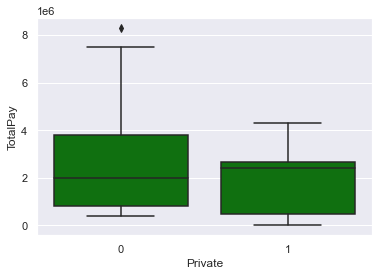

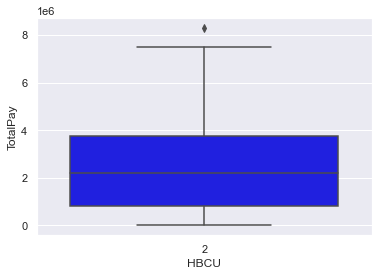

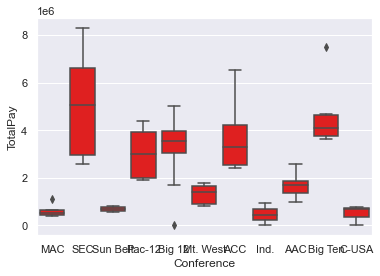

In [225]:
# relationship box plots
sns.boxplot(x="Private", y="TotalPay", data=df, color = "green")
plt.show()

sns.boxplot(x="HBCU", y="TotalPay", data=df, color = "blue")
plt.show()

sns.boxplot(x="Conference", y="TotalPay", data=df, color = "red")
plt.show()

In [238]:
# FINAL MODEL
# compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(df_test['TotalPay'].corr(df_test['predict_TotalPay']),2),3))

# use the full data set to obtain an estimate of the increase in salary controlling for other factors 
final_model_fit = smf.ols(model2, data = df).fit()
print(final_model_fit.summary())


Proportion of Test Set Variance Accounted for:  0.165
                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     10.89
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           1.20e-10
Time:                        16:11:22   Log-Likelihood:                -1040.4
No. Observations:                  68   AIC:                             2107.
Df Residuals:                      55   BIC:                             2136.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

C:\Users\nickl\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [227]:
model3 = str('TotalPay ~ Conference + Private')

In [243]:
# use the full data set to obtain an estimate of the increase in salary controlling for other factors 
final_model_fit = smf.ols(model3, data = df).fit()
print(final_model_fit.summary())


                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     12.04
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           3.64e-11
Time:                        16:17:38   Log-Likelihood:                -1040.5
No. Observations:                  68   AIC:                             2105.
Df Residuals:                      56   BIC:                             2132.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.85

In [244]:
# training set predictions from the model fit to the training set
df_train['predict_TotalPay'] = final_model_fit.fittedvalues

# test set predictions from the model fit to the training set
df_test['predict_TotalPay'] = final_model_fit.predict(df_test)

<ipython-input-244-9e901714e8f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['predict_TotalPay'] = final_model_fit.fittedvalues
<ipython-input-244-9e901714e8f5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict_TotalPay'] = final_model_fit.predict(df_test)


In [245]:
print(df_test)

              School Conference  TotalPay     APR_AVG  Private  HBCU  \
0              Akron        MAC    412500  932.454545        0     2   
17       Connecticut        AAC   1100000  958.636364        0     2   
22     Georgia State   Sun Belt    569000  184.545455        0     2   
33          Marshall      C-USA    762570  946.272727        0     2   
40  New Mexico State       Ind.    419640  918.636364        0     2   
41      Northwestern    Big Ten   3619775  983.818182        1     2   
42              Ohio        MAC    580331  948.272727        0     2   
46      Oregon State     Pac-12   1900008  942.000000        0     2   
50     South Alabama   Sun Belt    600000  185.000000        0     2   
53          Syracuse        ACC   2401206  957.727273        1     2   
63        Washington     Pac-12   4377500  956.000000        0     2   
65     West Virginia     Big 12   3617500  943.636364        0     2   

    Squad_Size  runiform  predict_TotalPay  
0          360  0.

In [256]:
# The predicted Total Pay for the Syracuse coach was $2,920,894


In [260]:
syr = df_test['School'] == 'Syracuse'
df_test.loc[syr, 'Conference'] = 'Big Ten'

In [261]:
# training set predictions from the model fit to the training set
df_train['predict_TotalPay'] = final_model_fit.fittedvalues

# test set predictions from the model fit to the training set
df_test['predict_TotalPay'] = final_model_fit.predict(df_test)

<ipython-input-261-9e901714e8f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['predict_TotalPay'] = final_model_fit.fittedvalues
<ipython-input-261-9e901714e8f5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict_TotalPay'] = final_model_fit.predict(df_test)


In [262]:
print(df_test)

              School Conference  TotalPay     APR_AVG  Private  HBCU  \
0              Akron        MAC    412500  932.454545        0     2   
17       Connecticut        AAC   1100000  958.636364        0     2   
22     Georgia State   Sun Belt    569000  184.545455        0     2   
33          Marshall      C-USA    762570  946.272727        0     2   
40  New Mexico State       Ind.    419640  918.636364        0     2   
41      Northwestern    Big Ten   3619775  983.818182        1     2   
42              Ohio        MAC    580331  948.272727        0     2   
46      Oregon State     Pac-12   1900008  942.000000        0     2   
50     South Alabama   Sun Belt    600000  185.000000        0     2   
53          Syracuse        ACC   2401206  957.727273        1     2   
63        Washington     Pac-12   4377500  956.000000        0     2   
65     West Virginia     Big 12   3617500  943.636364        0     2   

    Squad_Size  runiform  predict_TotalPay  
0          360  0.

In [ ]:
# predicted salary if Syracuse was in the big ten $3,597,142

In [263]:
# creating big east salary for syracuse coach based off of the other two previous schools and syracuse's predicted salary
big_east = (1859324 + 3382357 + 2920894)/3
print(big_east)

2720858.3333333335


In [ ]:
# if Syracuse stayed in the Big East the salary would be around $2,720,858

In [ ]:
# in total removed 61 schools because they did not match with the APR data from the ICPSR dataset
# On the test set APR was not significant and did not help determine the projected salary, was pretty even across the board except for the sun belt conference
# this model is decent the fit of the model or adjusted r squared is 70.3% and the model account for 64.4% of the variance in salary
# the biggest impact on the model is conference, mainly being in a power 5 or not power 5 conference as the variance within the two groups is a lot less than between them